In [58]:
from data_loader import get_train_test_dataset
import torchvision.transforms as transforms

transform_train = transforms.Compose([
        transforms.Resize(8),
        # transforms.RandomResizedCrop(224, scale=(0.2, 1.0), interpolation=3),  # 3 is bicubic
        # transforms.RandomHorizontalFlip(),
        # transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
dataset_train, test_dataset=get_train_test_dataset(data_root="/home/kang_you/DANN/dataset/dataset",target_data_id=0,transform=transform_train)

image,label = dataset_train[128]
print(image.shape,label)


train_data torch.Size([17964, 62, 5])
train_label torch.Size([17964])
test_data torch.Size([12348, 62, 5])
test_label torch.Size([12348])
torch.Size([5, 8, 8]) 0


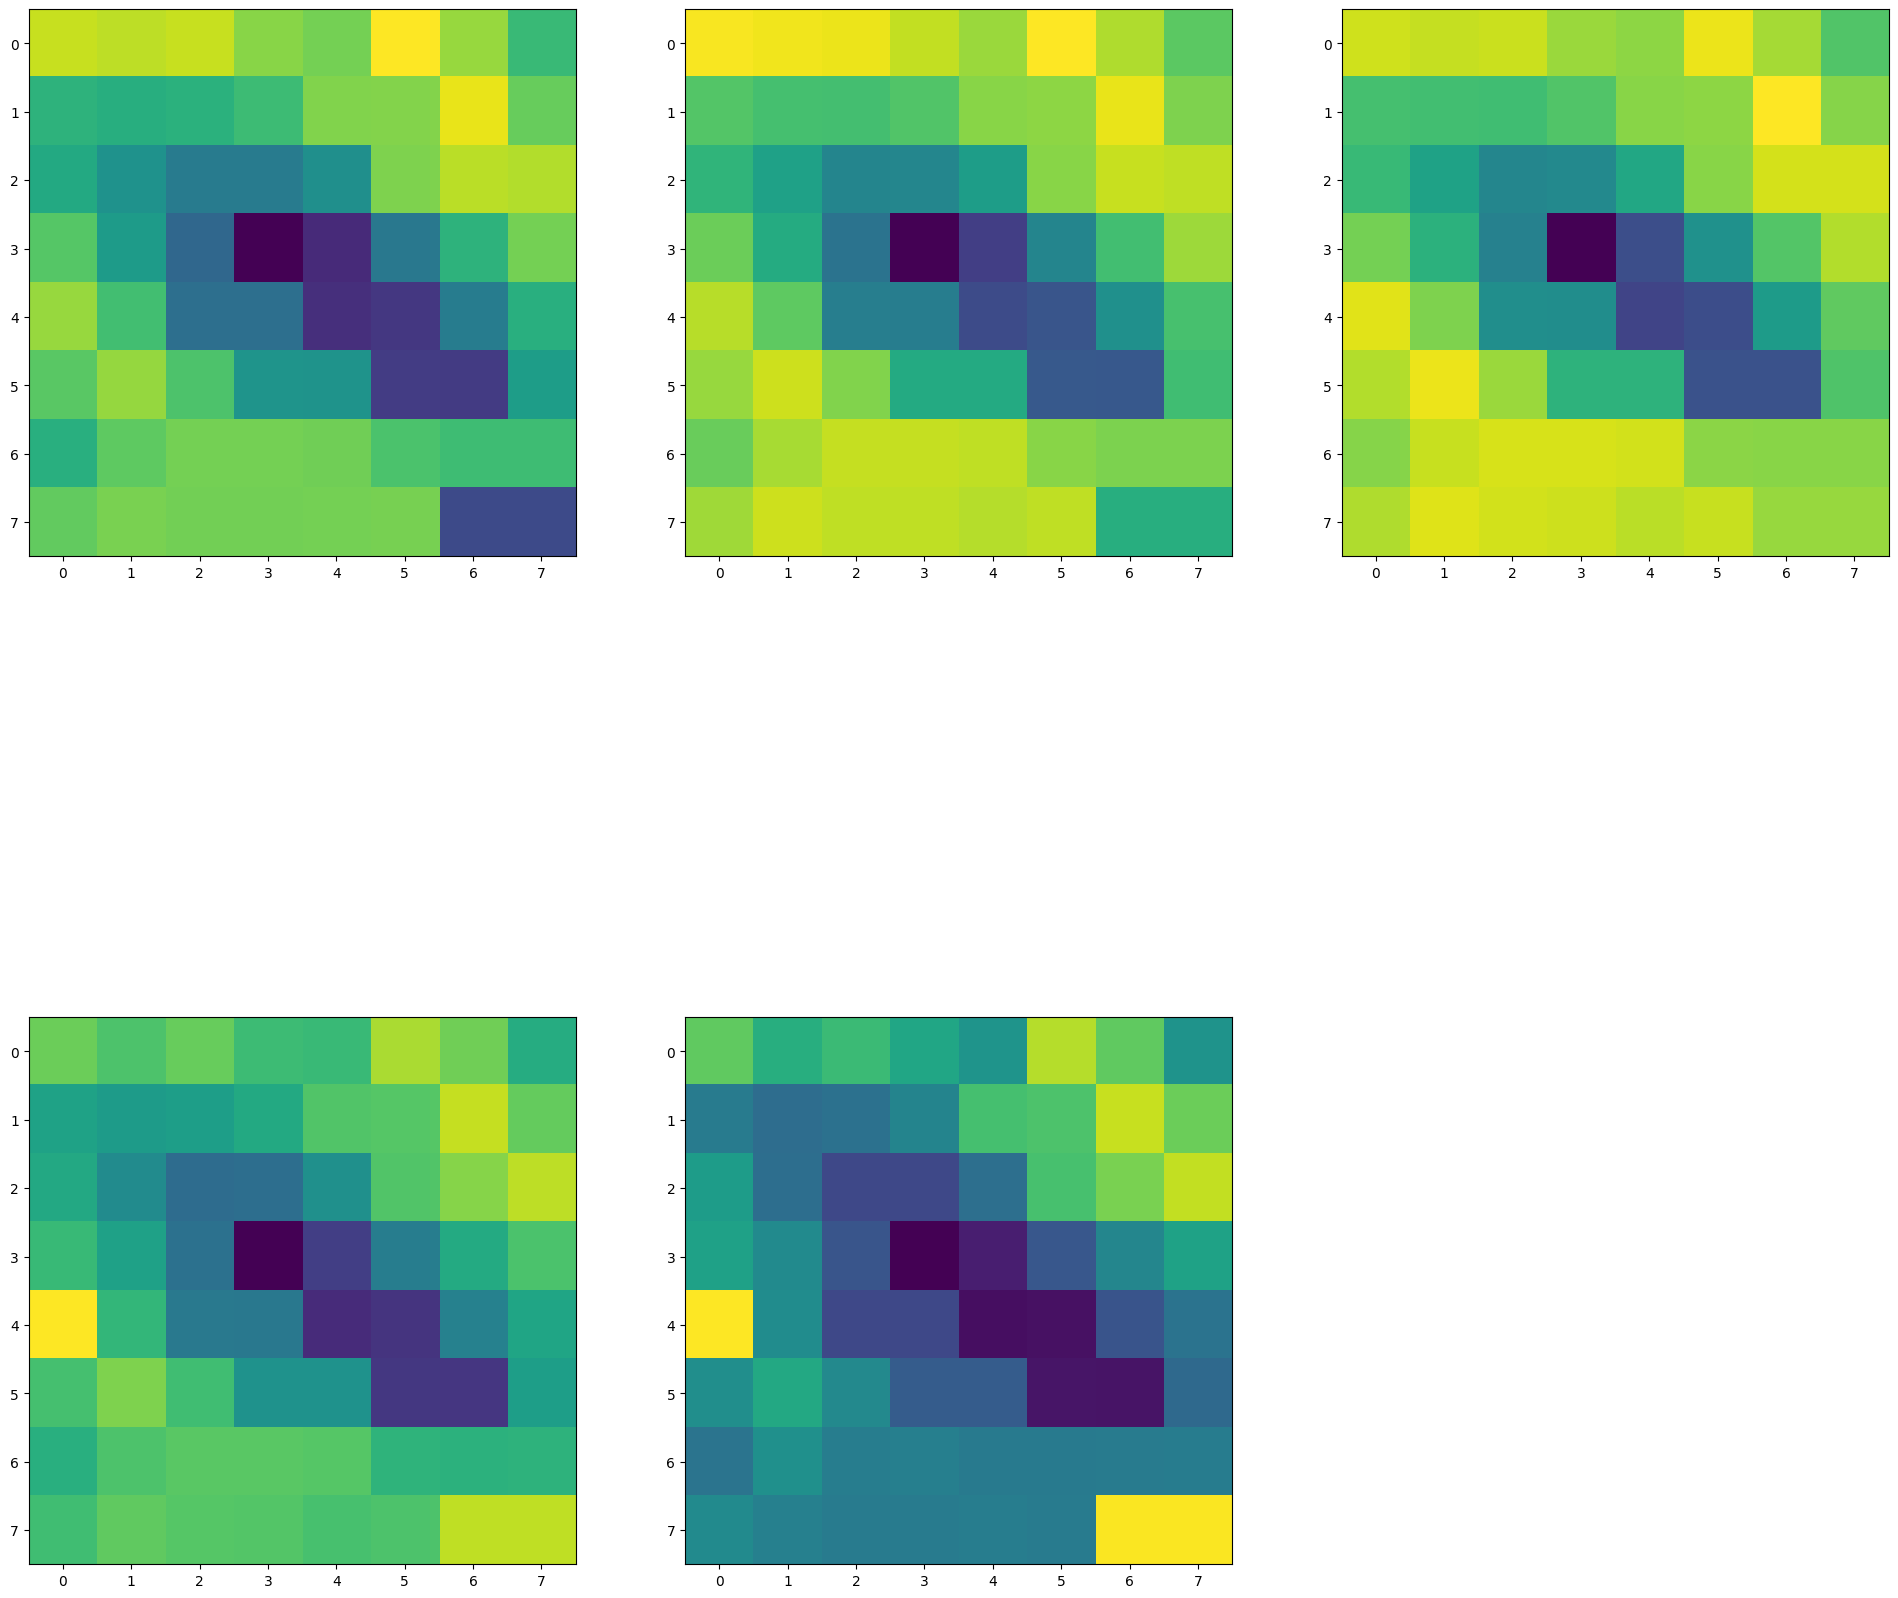

In [59]:

import matplotlib.pyplot as plt

plt.subplot(231)
plt.imshow(image[0])


plt.subplot(232)
plt.imshow(image[1])

plt.subplot(233)
plt.imshow(image[2])

plt.subplot(234)
plt.imshow(image[3])

plt.subplot(235)
plt.imshow(image[4])




<All keys matched successfully>
Model loaded.
MAE with pixel reconstruction:


/tmp/ipykernel_3633125/2857947645.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


tensor(0.0060, grad_fn=<DivBackward0>)
torch.Size([1, 5, 8, 8]) torch.Size([1, 5, 8, 8]) torch.Size([1, 5, 8, 8])
torch.Size([8, 8])
torch.Size([8, 8])
torch.Size([8, 8])
torch.Size([8, 8])


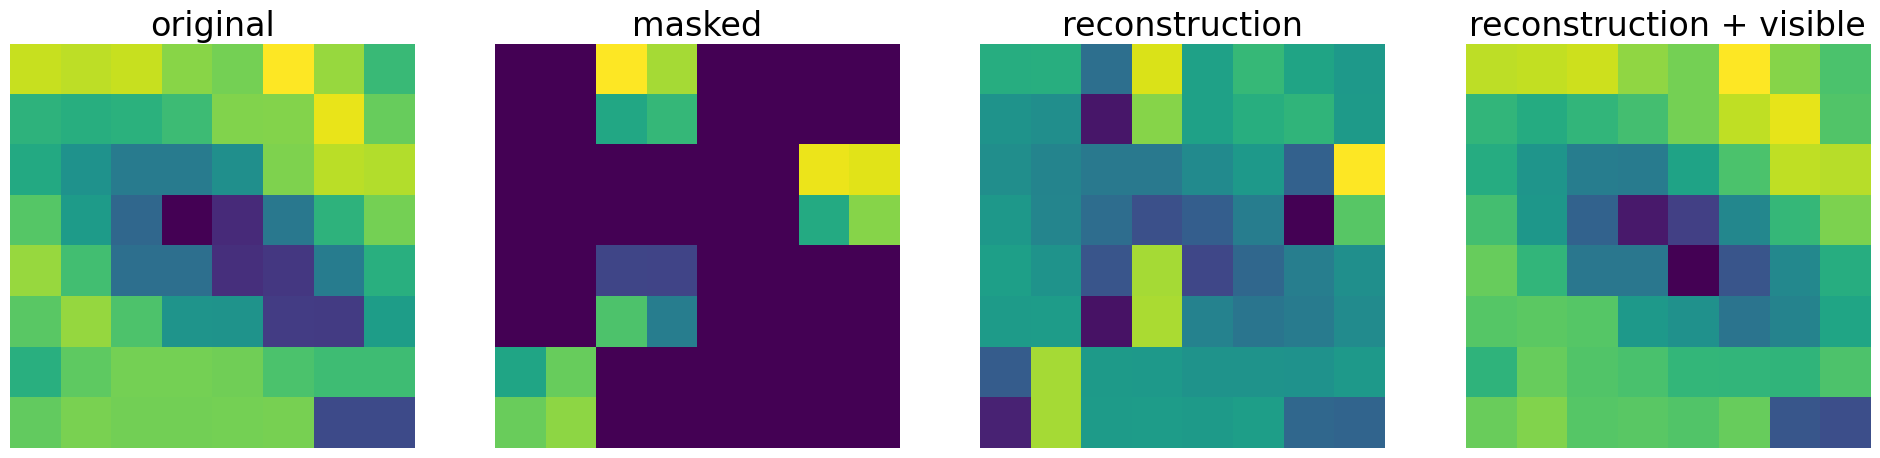

torch.Size([8, 8])
torch.Size([8, 8])
torch.Size([8, 8])
torch.Size([8, 8])


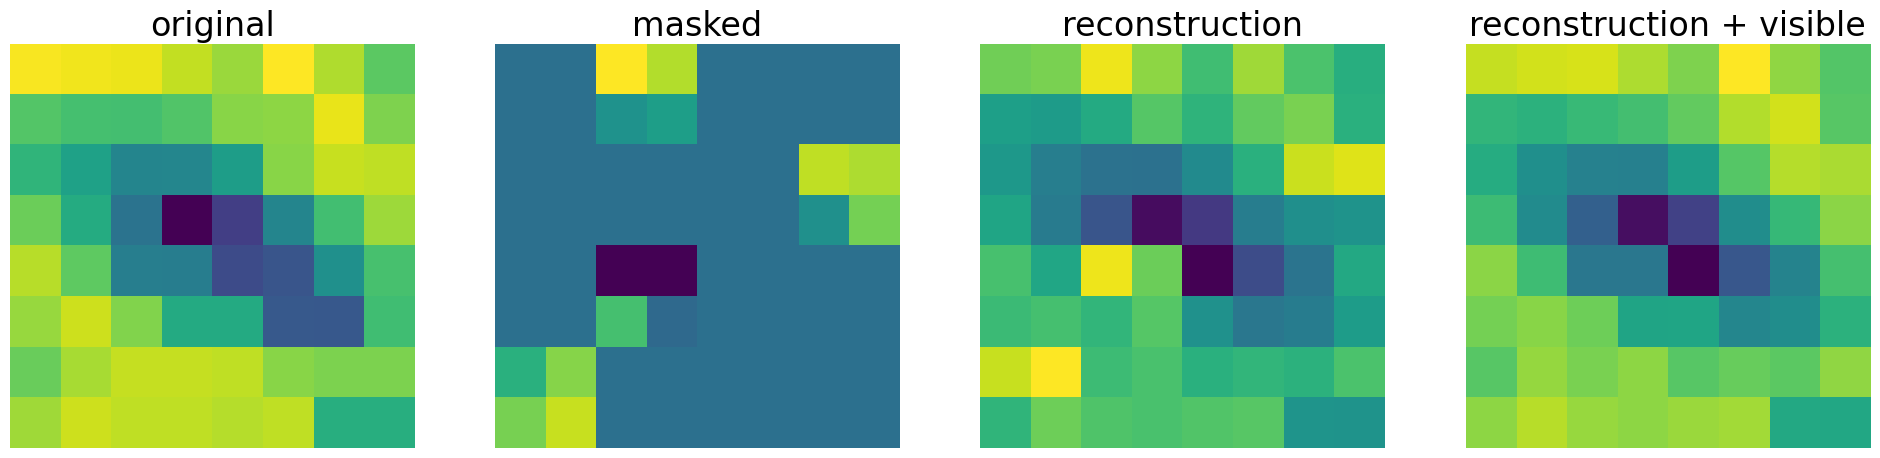

torch.Size([8, 8])
torch.Size([8, 8])
torch.Size([8, 8])
torch.Size([8, 8])


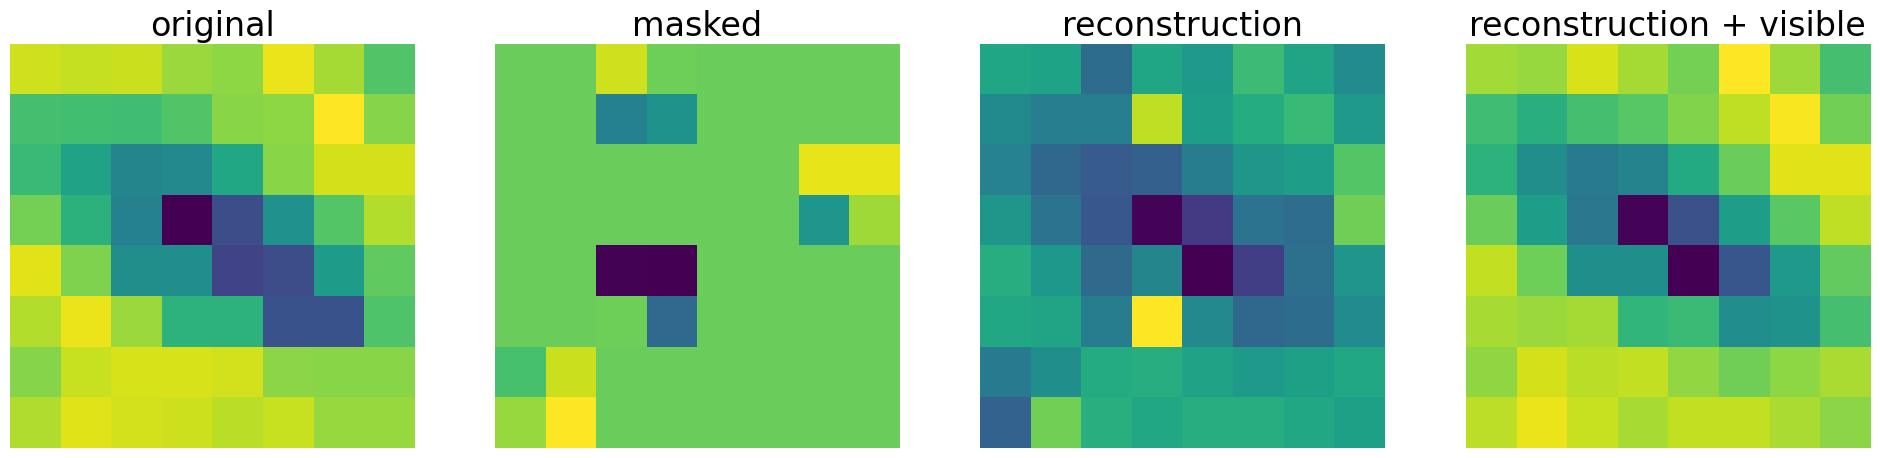

torch.Size([8, 8])
torch.Size([8, 8])
torch.Size([8, 8])
torch.Size([8, 8])


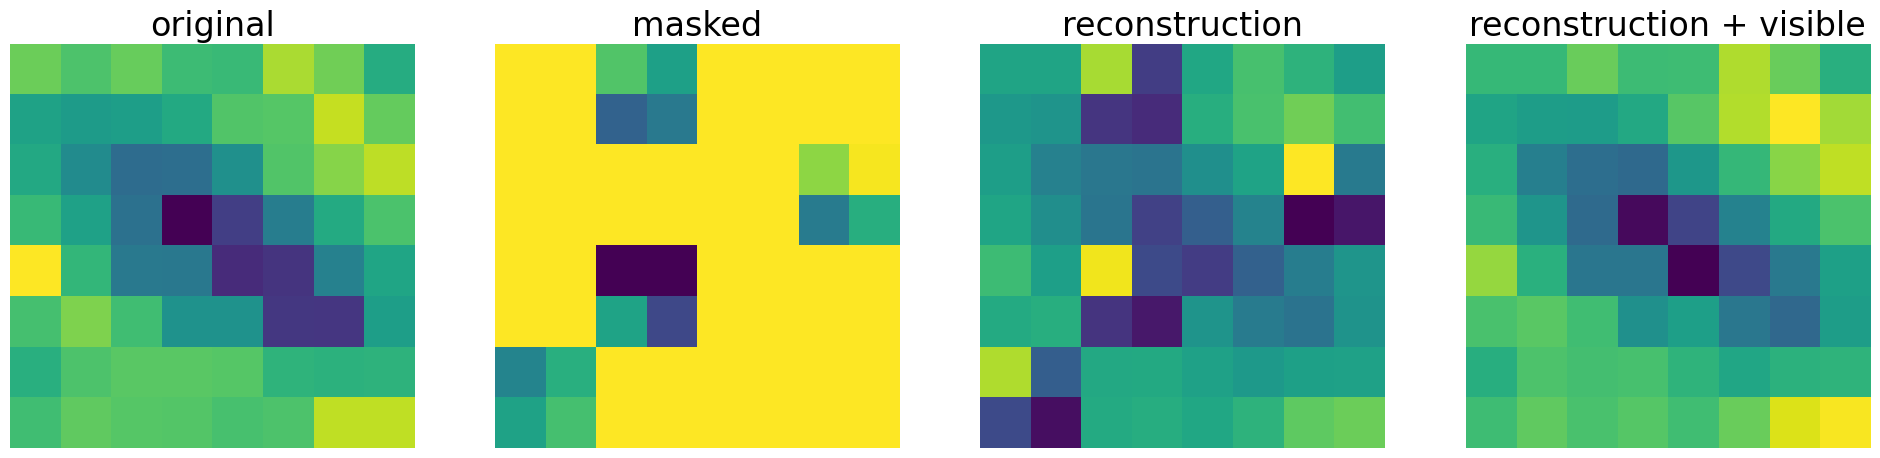

torch.Size([8, 8])
torch.Size([8, 8])
torch.Size([8, 8])
torch.Size([8, 8])


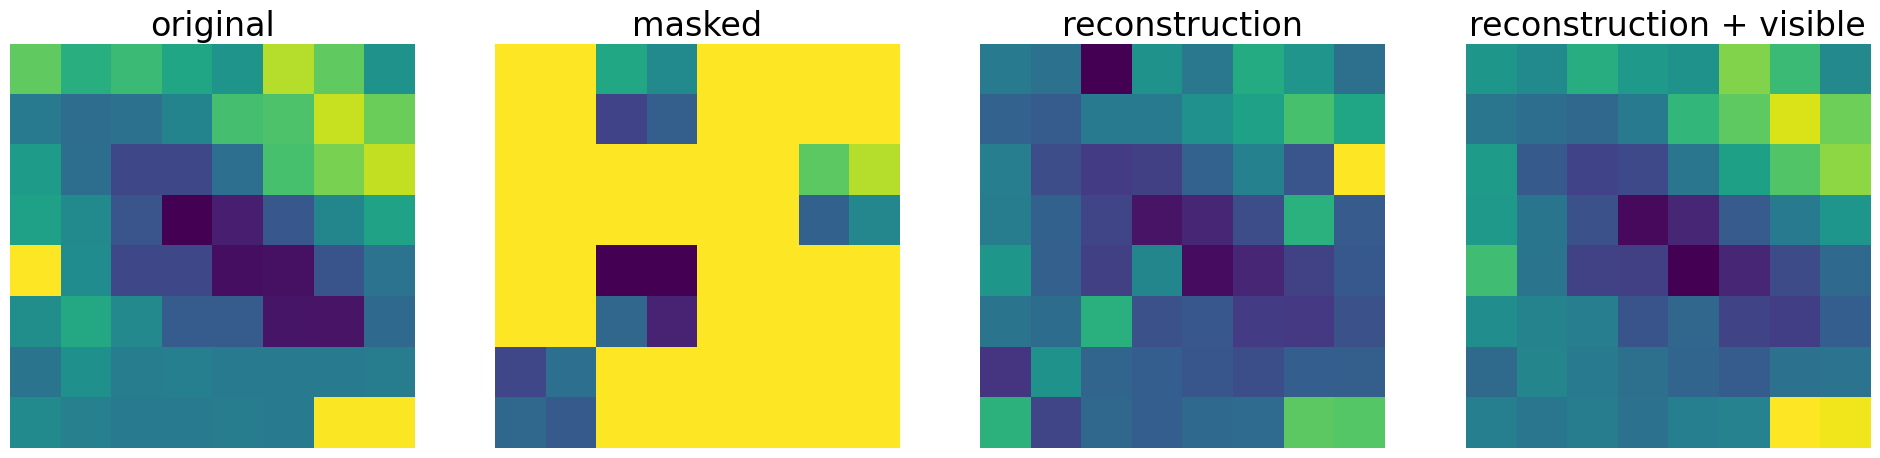

In [60]:
import models_mae
import sys
import os
import requests

import torch
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

def show_image(image, title=''):
    # image is [H, W, 3]
    print(image.shape)
    plt.imshow(image)
    plt.title(title, fontsize=24)
    plt.axis('off')
    return

def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    model = getattr(models_mae, arch)(in_chans=5)
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model

def run_one_image(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    # x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.75)
    y = model.unpatchify(y)
    print(loss)

    # y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # visualize the mask
    mask = mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 *5)  # (N, H*W, p*p*5)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    # mask = torch.einsum('nchw->nhwc', mask).detach().cpu()
    
    # x = torch.einsum('nchw->nhwc', x)

    # masked image
    print(x.shape,mask.shape,y.shape)
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    for i in range(5):
        plt.rcParams['figure.figsize'] = [24, 24]

        plt.subplot(1, 4, 1)
        show_image(x[0][i], "original")

        plt.subplot(1, 4, 2)
        show_image(im_masked[0][i], "masked")

        plt.subplot(1, 4, 3)
        show_image(y[0][i].detach(), "reconstruction")

        plt.subplot(1, 4, 4)
        show_image(im_paste[0][i].detach(), "reconstruction + visible")
    
        # plt.savefig(f"channel{i}_visulize.png",dpi=600)
        plt.show()


chkpt_dir = '/home/kang_you/mae-main-my/output_dir_mask_ratio0.75/checkpoint-60.pth'
model_mae = prepare_model(chkpt_dir, 'mae_vit_small_patch16')
print('Model loaded.')

torch.manual_seed(2)
print('MAE with pixel reconstruction:')
run_one_image(image, model_mae)

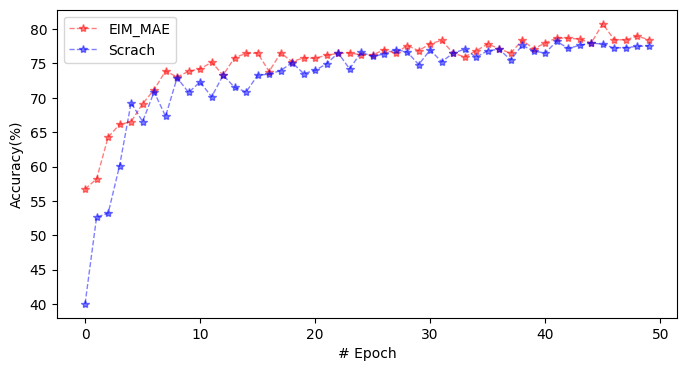

In [67]:
acc_scrach = [40.05506966080834, 
52.648202151900016,
53.182701664446704,
60.12309687632668, 
69.27437644503748, 
66.54518952599845, 
70.84548107118795, 
67.31454488410122, 
72.91059282708794, 
70.77259476608855, 
72.30320702025448, 
70.13281505857813, 
73.28312279454396, 
71.51765470254526, 
70.84548107273261, 
73.2669258395715, 
73.43699386678237, 
73.94719795613834, 
75.11337870643253, 
73.51797864782336, 
73.97149337932906, 
74.9514091597972, 
76.50631684024317, 
74.19825074894358, 
76.61969551732713, 
76.02040818025658, 
76.35244575873679, 
76.99222547705983, 
76.66828638224452, 
74.82993199286972, 
76.94363461523176, 
75.23485587027068, 
76.49011987600274, 
77.0651117759806, 
75.89893101487378, 
76.83835440636608, 
77.04891482409745, 
75.50210562577169, 
77.63200520465085, 
76.78166505932846, 
76.50631682788588, 
78.21509558057028, 
77.17039197866762, 
77.6239067240753, 
77.96404277231842, 
77.79397475128619, 
77.22708132107125, 
77.30806609593358, 
77.461937168172, 
77.55911889800679, ]

acc_EIM_MAE = [
56.7136378530781,
58.21185618803113, 
64.26141887642552, 
66.13216716802194, 
66.52089408890576, 
69.12860383638333, 
71.16942017372658, 
73.89860708040831, 
73.00777455228874, 
73.85001620931227, 
74.18205379242646, 
75.17816653095637, 
73.29122126430688, 
75.84224168328278, 
76.44962749783954, 
76.49821836121228, 
73.817622300912, 
76.50631683715385, 
75.26724977403696, 
75.79365081991004, 
75.73696146360446, 
76.20667317016324, 
76.44152901108535, 
76.53871073783081, 
76.21477164147083, 
76.21477164147083, 
77.00842243512163, 
76.44152901726399, 
77.5996113039739, 
76.84645289157562, 
77.86686104711762,
78.3284742669222, 
76.48202140160583, 
75.94752189214847, 
76.83025592887985, 
77.82636866277578, 
77.12989960359376, 
76.45772597687045,
78.3851636062365, 
77.11370264398731, 
77.96404278776504, 
78.70910270877513, 
78.66051184385773, 
78.53903468619824, 
77.9478458235246, 
80.76611598873355, 
78.43375448042187, 
78.42565599675699, 
78.96015551548233, 
78.44995142767102, 
77.810171704714, 
78.44995143539434,
78.90346617616802, 
79.6971169620955, 
79.0816326700525, 
78.7172011847167, 
78.98445094330704, 
78.28798189030367, 
78.83867835318884, 
79.34888243327683,
78.4175575177261, 
77.94784582970325, 
78.62001946260521, 
79.70521543803707, 
78.24748949978319, 
79.64852609872277, 
78.27988339582616, 
78.90346616998937, 
78.66051183767908, 
79.31648852487656, 
80.40168450803174, 
78.8467768214071, 
80.42597993431178, 
78.6848072778611, 
78.63621640985437, 
79.44606416465628, 
78.692905752258, 
79.61613218723318, 
80.33689668505254, 
80.40168450494241, 
80.73372208187794, 
79.68092001175702, 
79.52704893488462, 
80.0291545405757, 
79.71331391861264, 
79.6647230598739, 
79.26789765686985, 
79.494655032663, 
79.73760935724998, 
80.45837385043535, 
80.18302561899277, 
80.28020734882756, 
79.97246520435073, 
79.53514741700484, 
79.89957890697463, 
80.02915454675436, 
79.92387433943333, 
79.8671849970297, 
79.87528347451594, 
79.88338195200217,]


import matplotlib.pyplot as plt
import numpy as np

acc_EIM_MAE = acc_EIM_MAE[:50]
x_axis_data = [i for i in range(50)] #x

plt.figure(figsize=(8,4))
plt.plot(x_axis_data, acc_EIM_MAE, 'r*--', alpha=0.5, linewidth=1, label='EIM_MAE')#'bo-'表示蓝色实线，数据点实心原点标注
## plot中参数的含义分别是横轴值，纵轴值，线的形状（'s'方块,'o'实心圆点，'*'五角星   ...，颜色，透明度,线的宽度和标签 ，
plt.plot(x_axis_data, acc_scrach, 'b*--', alpha=0.5, linewidth=1, label='Scrach')#'bo-'表示蓝色实线，数据点实心原点标注

plt.legend()  #显示上面的label
plt.xlabel('# Epoch') #x_label
plt.ylabel('Accuracy(%)')#y_label
 
#plt.ylim(-1,1)#仅设置y轴坐标范围
plt.show()

